In [5]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path(os.getcwd()).parent
DATA_DIR = PROJECT_ROOT / "data" / "wlasl_reduced"


In [2]:
df = pd.read_csv(DATA_DIR / "metadata.csv")

In [3]:
df

,filepath,gloss,fps,duration,num_frames,video_width,video_height,bbox_x,bbox_y,bbox_w,bbox_h
0,videos/accident/00623.mp4,accident,24.0,4.17,100,320,240,0.168750,0.025000,0.681250,0.975000
1,videos/accident/00624.mp4,accident,24.0,3.62,87,320,240,0.131250,0.025000,0.737500,0.975000
2,videos/accident/00625.mp4,accident,24.0,1.42,34,1920,1080,0.351562,0.046296,0.409375,0.953704
3,videos/accident/00626.mp4,accident,24.0,1.83,44,1920,1080,0.252604,0.078704,0.584896,0.921296
4,videos/accident/00627.mp4,accident,24.0,1.04,25,1920,1080,0.344792,0.050000,0.402083,0.950000
...,...,...,...,...,...,...,...,...,...,...,...
389,videos/you/64382.mp4,you,24.0,2.04,49,640,480,0.239063,0.012500,0.575000,0.987500
390,videos/you/64383.mp4,you,24.0,2.67,64,640,480,0.028125,0.014583,0.839063,0.985417
391,videos/you/64385.mp4,you,24.0,1.71,41,288,192,0.250000,0.083333,0.479167,0.916667
392,videos/you/64391.mp4,you,24.0,2.71,65,720,400,0.355556,0.125000,0.333333,0.875000


In [4]:
df["gloss"].value_counts()

gloss
before          16
thin            16
cool            16
go              15
drink           15
who             14
computer        14
cousin          14
help            14
tall            13
short           13
thanksgiving    13
trade           13
accident        13
candy           13
bowling         13
bed             13
man             12
pizza           12
no              11
good            10
wait            10
doctor          10
bad             10
like            10
son             10
now              9
you              8
find             8
thank you        7
please           7
hospital         7
bathroom         7
me               4
i                4
Name: count, dtype: int64

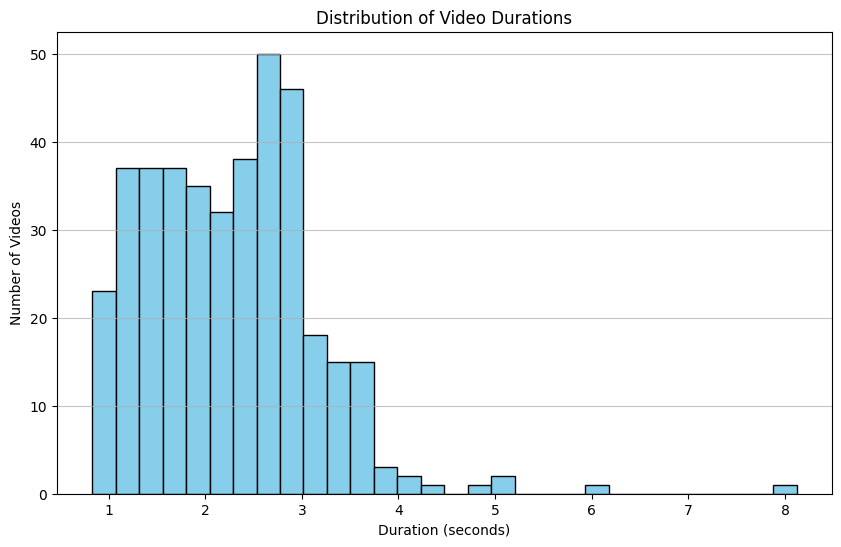

In [6]:
# Plot distribution of video durations
plt.figure(figsize=(10, 6))
plt.hist(df["duration"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Video Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Videos")
plt.grid(axis='y', alpha=0.75)
plt.show()

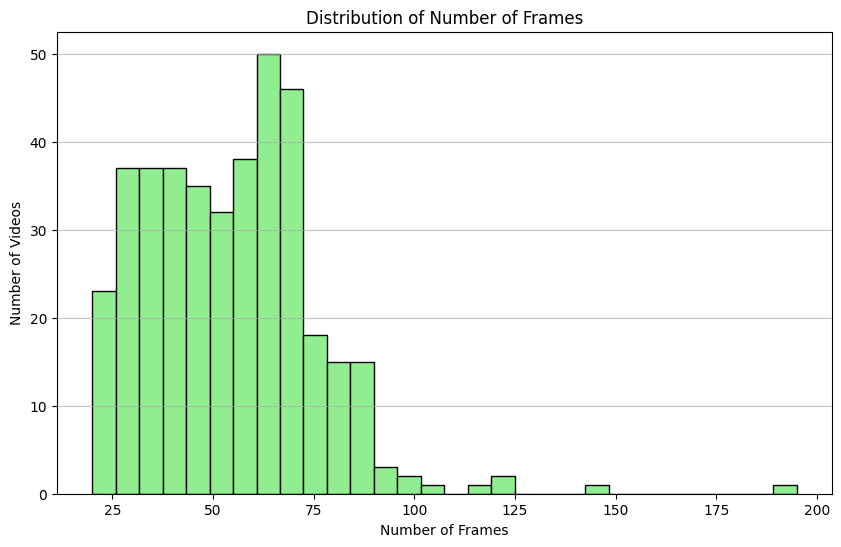

In [7]:
# Plot distribution of number of frames
plt.figure(figsize=(10, 6))
plt.hist(df["num_frames"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("Number of Videos")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [1]:
from video_features.models.i3d.extract_i3d import ExtractI3D
from omegaconf import OmegaConf
from video_features.utils.utils import build_cfg_path

In [3]:

args = OmegaConf.load(build_cfg_path("i3d"))
args.video_paths = ["../data/wlasl_reduced/videos/accident/00623.mp4"]
args.flow_type = "raft"
args.device = "cpu"
extractor = ExtractI3D(args)

In [5]:
for video_path in args.video_paths:
    feature_dict = extractor.extract(video_path)
    [(print(k), print(v.shape), print(v)) for k, v in feature_dict.items()]

d:\jherng\Workspace\university\masters\courses\year2526_sem1\wqf7002_artificial_intelligence_techniques\assignment\sign-language-model\.venv\Lib\site-packages\video_features\models\raft\raft_src\raft.py:131: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.mixed_precision):
d:\jherng\Workspace\university\masters\courses\year2526_sem1\wqf7002_artificial_intelligence_techniques\assignment\sign-language-model\.venv\Lib\site-packages\video_features\models\raft\raft_src\raft.py:142: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.mixed_precision):
d:\jherng\Workspace\university\masters\courses\year2526_sem1\wqf7002_artificial_intelligence_techniques\assignment\sign-language-model\.venv\Lib\site-packages\video_features\models\raft\raft_src\raft.py:159: FutureWarning: `torch.cuda.amp.autoc

rgb
(1, 1024)
[[0.41268611 0.05494877 0.18180951 ... 0.15959498 0.07257964 0.26600558]]
flow
(1, 1024)
[[0.39913559 0.0524618  0.11449503 ... 0.01979869 0.00531423 0.16202095]]
fps
()
24.0
timestamps_ms
(1,)
[2666.66666667]
